In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


*** EDA ***


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df_copy = df.copy()
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age' ]] = df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age' ]].replace(0, np.NaN)

In [10]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

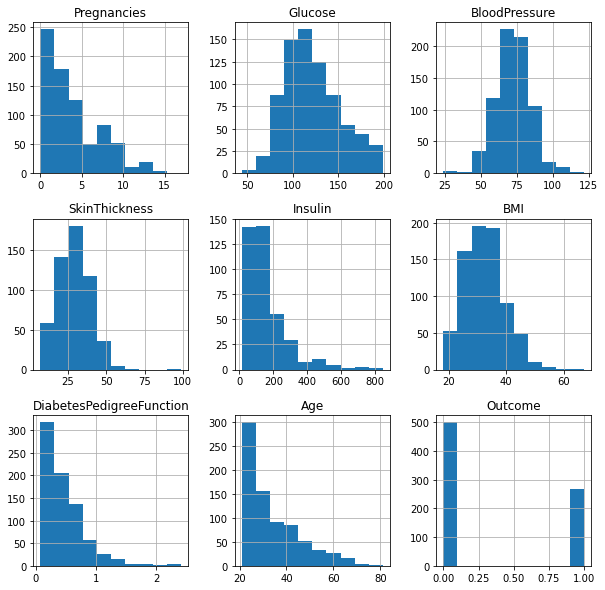

In [11]:
df_copy.hist(figsize = (10,10))

In [12]:
df_copy['Glucose'].fillna(df_copy["Glucose"].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy["BloodPressure"].mean(), inplace=True)
df_copy['BMI'].fillna(df_copy["BMI"].mean(), inplace=True)
df_copy['Insulin'].fillna(df_copy["Insulin"].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy["SkinThickness"].mean(), inplace=True)

In [13]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

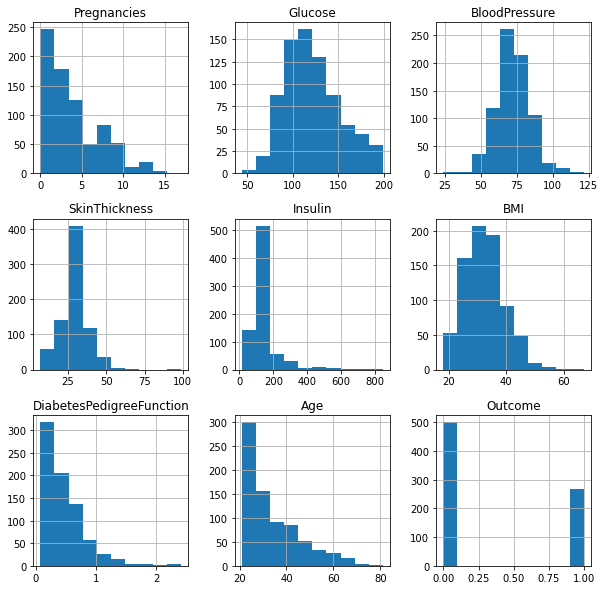

In [14]:
df_copy.hist(figsize = (10, 10))

<AxesSubplot:>

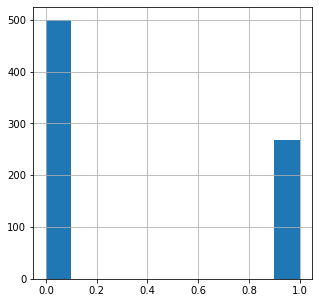

In [15]:
df_copy['Outcome'].hist(figsize = (5,5))

*** correlation  ***

In [16]:
correlation = df_copy.corr() 

<AxesSubplot:>

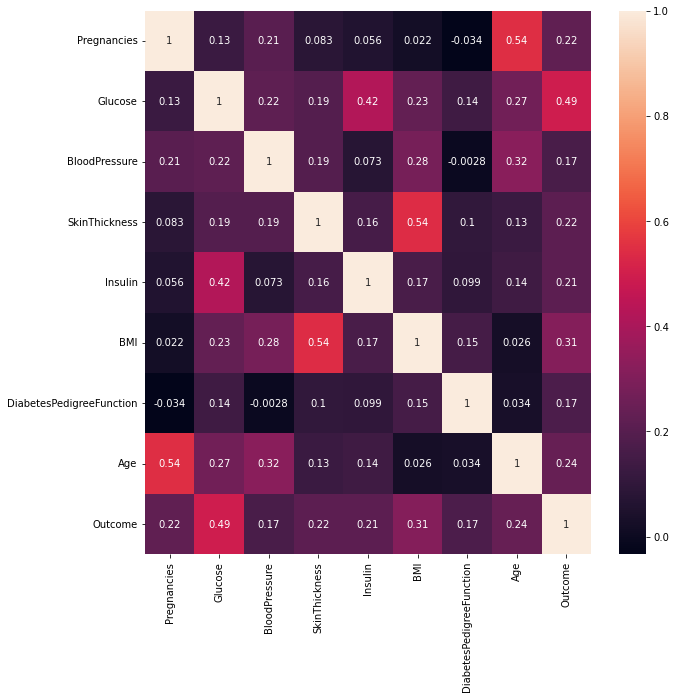

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True )

In [18]:
df_copy.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [19]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [20]:
X= pd.DataFrame(df_copy.drop(["Outcome"], axis=1))
y=df_copy["Outcome"]
print(X, y)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [21]:
X_train, X_test ,y_train ,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
X_train.shape

(537, 8)

In [23]:
X_test.shape

(231, 8)

In [24]:
y_train.shape

(537,)

In [25]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)



KNeighborsClassifier()

In [26]:
y_predict = model.predict(X_test)

In [27]:
mean_squared_error(y_pred=y_predict, y_true=y_test)

0.3246753246753247

In [28]:
result = []
for n in range(5, 60):
    knn=KNeighborsClassifier(n)
    knn.fit(X_train, y_train)
    prediction=knn.predict(X_test)
    result.append((n, mean_squared_error(y_pred=prediction, y_true=y_test)))

In [29]:
result


[(5, 0.3246753246753247),
 (6, 0.3116883116883117),
 (7, 0.31601731601731603),
 (8, 0.30735930735930733),
 (9, 0.30735930735930733),
 (10, 0.29004329004329005),
 (11, 0.29004329004329005),
 (12, 0.2857142857142857),
 (13, 0.2857142857142857),
 (14, 0.27705627705627706),
 (15, 0.26406926406926406),
 (16, 0.29004329004329005),
 (17, 0.2554112554112554),
 (18, 0.2727272727272727),
 (19, 0.2597402597402597),
 (20, 0.26406926406926406),
 (21, 0.26406926406926406),
 (22, 0.2727272727272727),
 (23, 0.2683982683982684),
 (24, 0.2813852813852814),
 (25, 0.29004329004329005),
 (26, 0.29004329004329005),
 (27, 0.2813852813852814),
 (28, 0.27705627705627706),
 (29, 0.27705627705627706),
 (30, 0.2727272727272727),
 (31, 0.27705627705627706),
 (32, 0.2727272727272727),
 (33, 0.2727272727272727),
 (34, 0.2597402597402597),
 (35, 0.26406926406926406),
 (36, 0.26406926406926406),
 (37, 0.2683982683982684),
 (38, 0.27705627705627706),
 (39, 0.2813852813852814),
 (40, 0.29004329004329005),
 (41, 0.268398

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(5, 60)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7540022069433834
Best Parameters: {'n_neighbors': 47}


In [31]:
new_prediction = knn_cv.predict(X_test)

In [32]:
new_result = mean_squared_error( y_pred=new_prediction, y_true=y_test)

In [33]:
new_result

0.26406926406926406

In [34]:
KN=KNeighborsClassifier(19)
KN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [35]:
predic = KN.predict(X_test)

In [36]:
new_resu = mean_squared_error(y_pred = predic, y_true=y_test)

In [37]:
new_resu

0.2597402597402597

In [38]:
KN.score(X_test, y_test)

0.7402597402597403